# Problem Statement: Predicting Heart Disease using Logistic Regression

In [1]:
# APPROACH
# Step1: Download the dataset and create the dataframe with attributes using pandas then assigns the values
# Step2: See if there is any missing values or unknown values
# Step3: Replace "?"(unknow value) by NAN
# step4: remove the rows which contain NAN values
# step5: do feature scaling
# step6: spliting the datset into traing and testing then traning the logistic regression model using train dataset
# step7:instead of deleting the rows which contains nan values use imputation methods and follow step5 and 6
# step8: as the target contains 5 values i.e from 1 to 4 it show disease is present and 0 means no disease so replace the target values which has 2,3 with 1 and follow step 5 and 6

In [2]:
# importing the required packages
import numpy as np # used for Numerical Calculations
import pandas as pd # used for Data Manipulation
import matplotlib.pyplot as plt # used for Data visualizations

#  Data Exploration

In [3]:
#Load the "Heart Disease UCI" dataset into your Python environment

In [4]:
# this file contains numerical values which are separated by comma
with open('cdata.txt','r') as f:
    values = f.readlines()

In [5]:
data = pd.DataFrame(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [6]:
data['age'] = [value.strip().split(',')[0] for value in values]
data['sex'] = [value.strip().split(',')[1] for value in values]
data['cp'] = [value.strip().split(',')[2] for value in values]
data['trestbps'] = [value.strip().split(',')[3] for value in values]
data['chol'] = [value.strip().split(',')[4] for value in values]
data['fbs'] = [value.strip().split(',')[5] for value in values]
data['restecg'] = [value.strip().split(',')[6] for value in values]
data['thalach'] = [value.strip().split(',')[7] for value in values]
data['exang'] = [value.strip().split(',')[8] for value in values]
data['oldpeak'] = [value.strip().split(',')[9] for value in values]
data['slope'] = [value.strip().split(',')[10] for value in values]
data['ca'] = [value.strip().split(',')[11] for value in values]
data['thal'] = [value.strip().split(',')[12] for value in values]
data['target'] = [value.strip().split(',')[13] for value in values]

In [7]:
#Perform exploratory data analysis to gain insights into the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalach   303 non-null    object
 8   exang     303 non-null    object
 9   oldpeak   303 non-null    object
 10  slope     303 non-null    object
 11  ca        303 non-null    object
 12  thal      303 non-null    object
 13  target    303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,50,152,2,3,91,2,40,3,5,4,5
top,58.0,1.0,4.0,120.0,197.0,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,0
freq,19,206,144,37,6,258,151,11,204,99,142,176,166,164


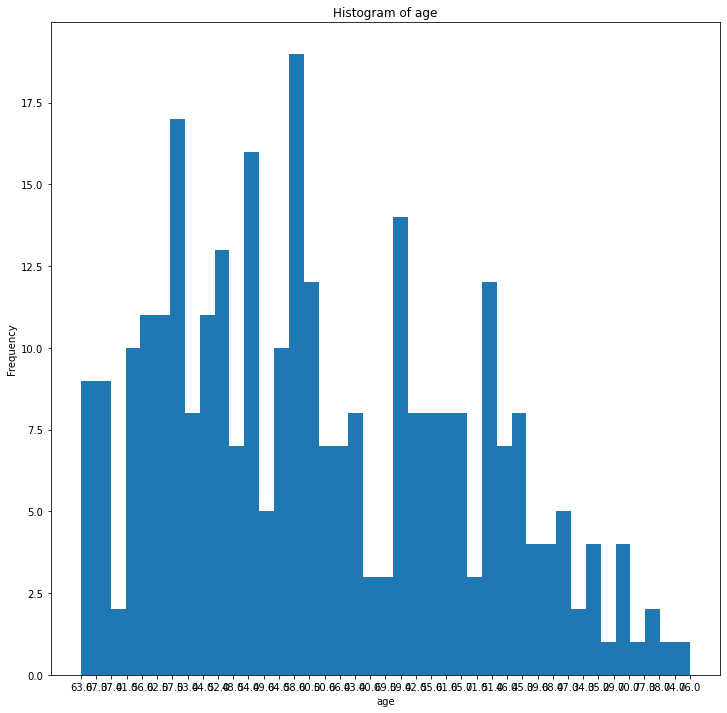

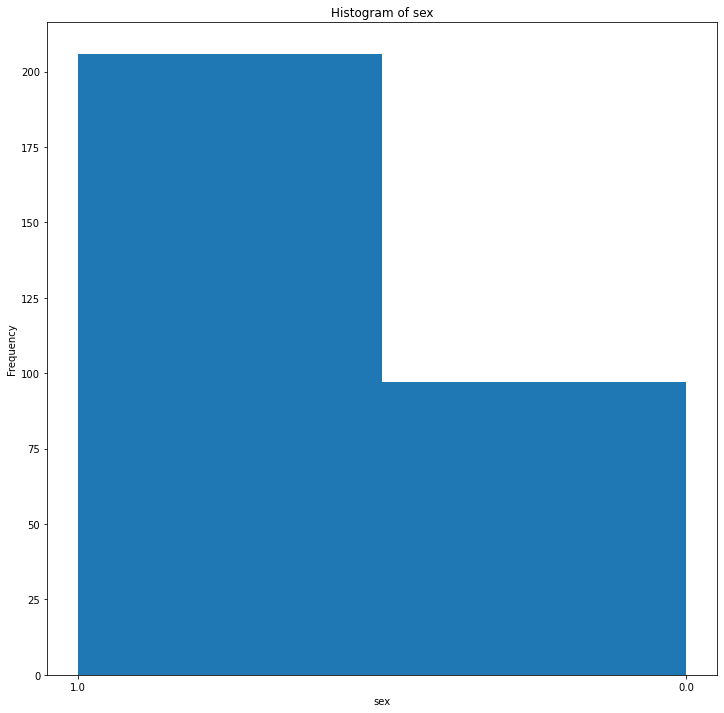

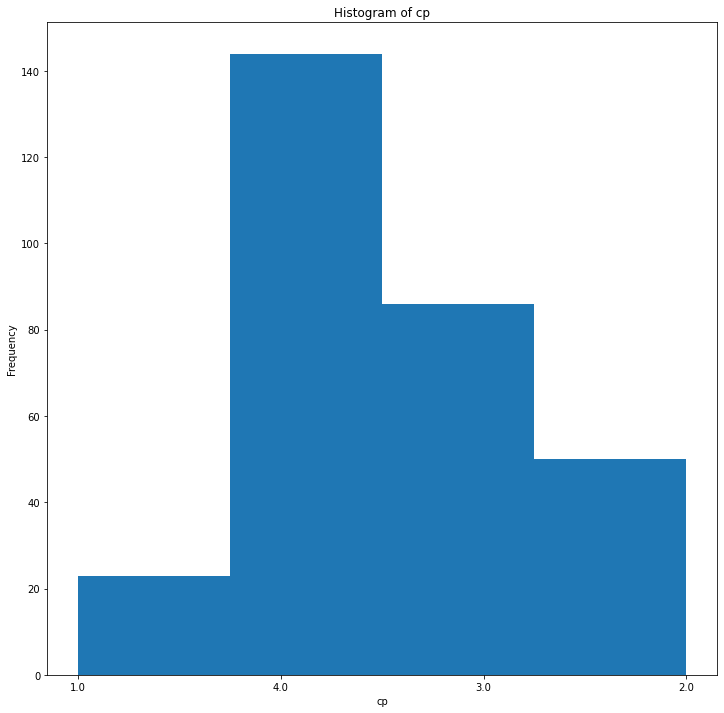

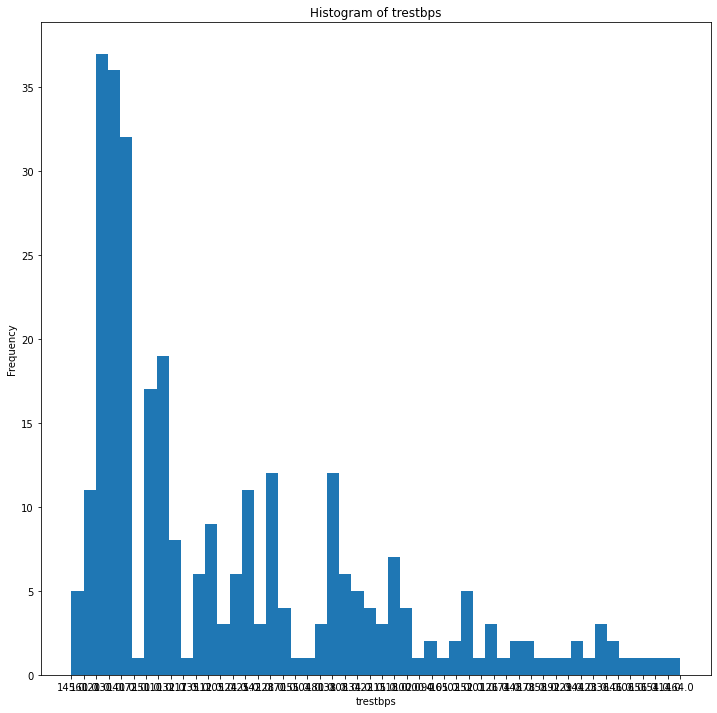

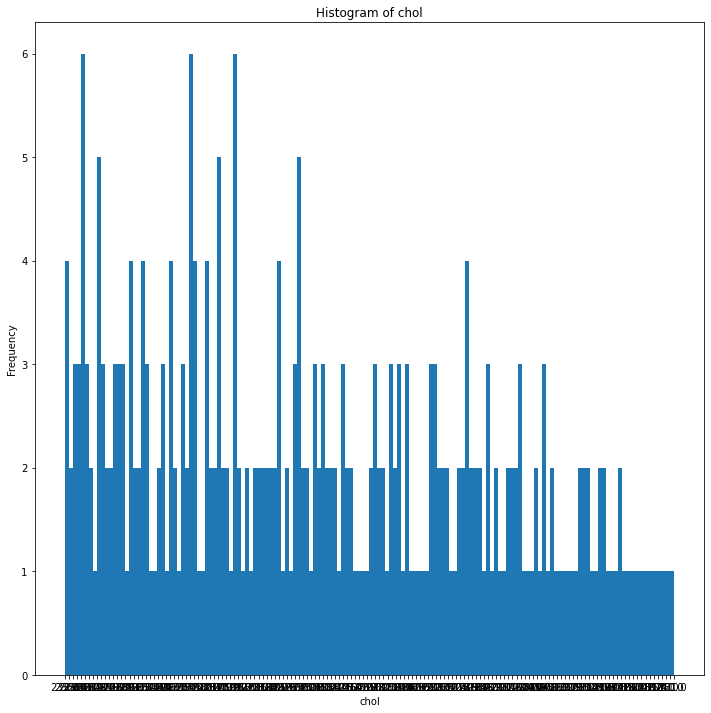

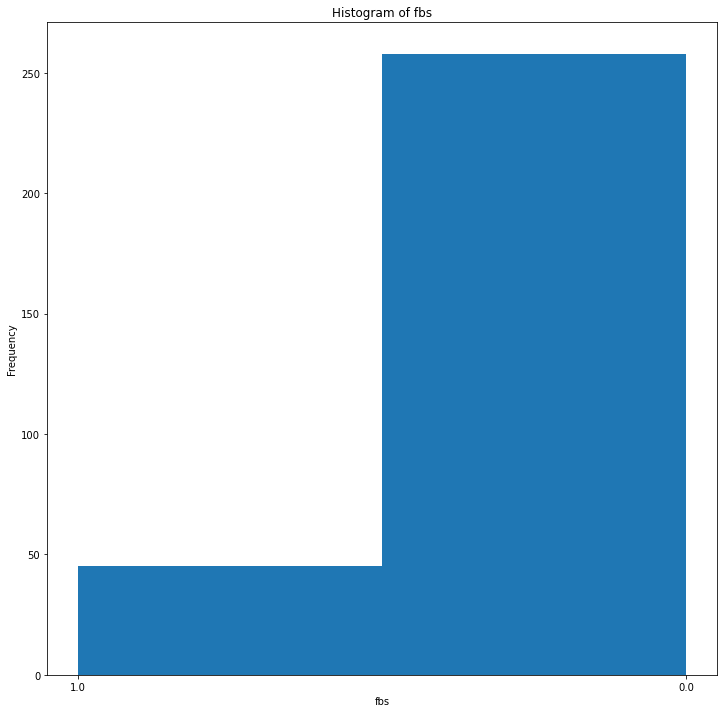

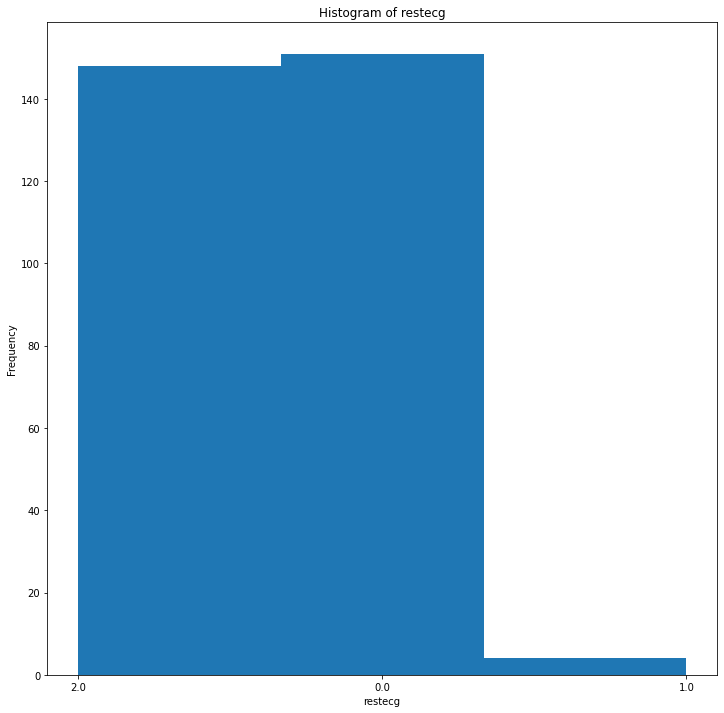

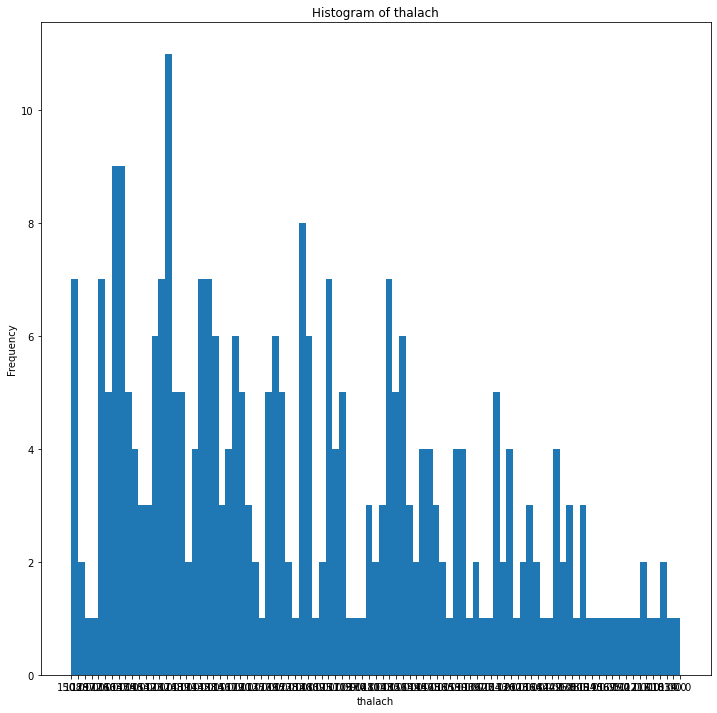

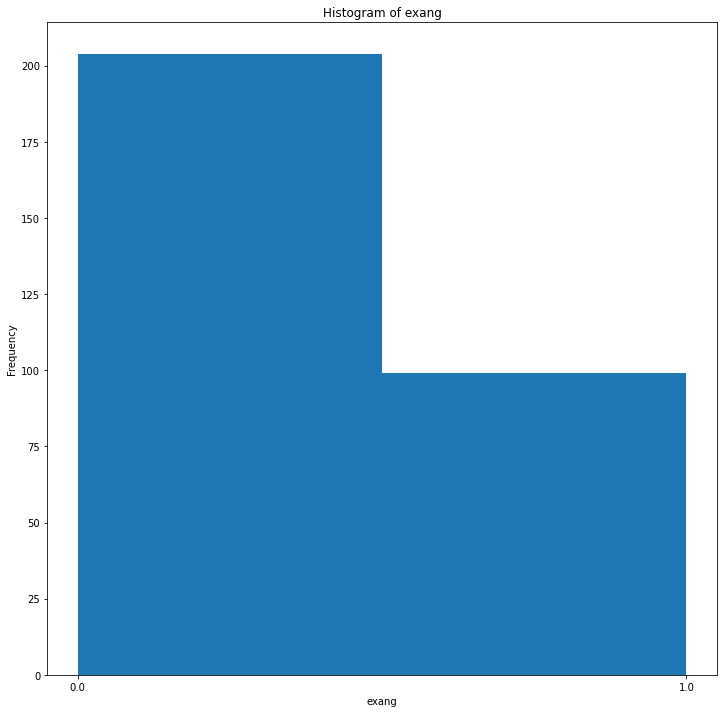

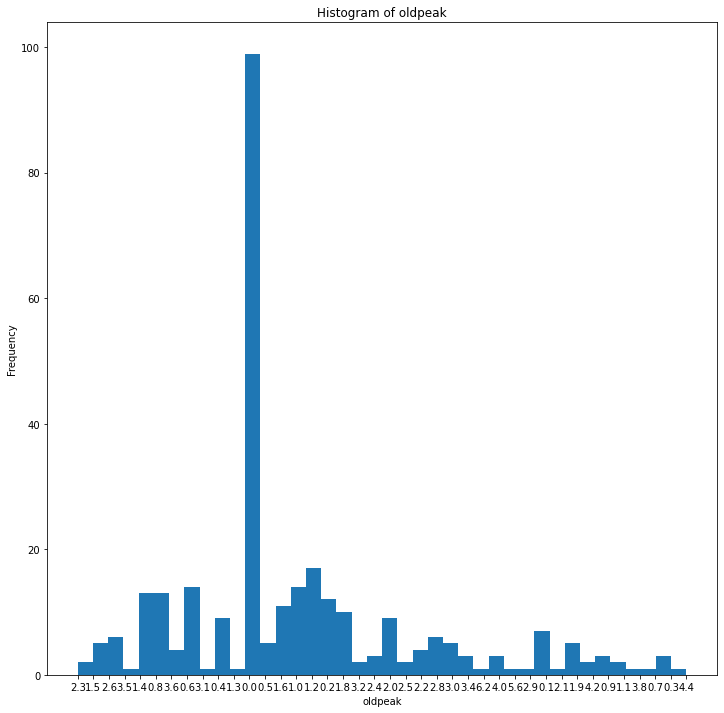

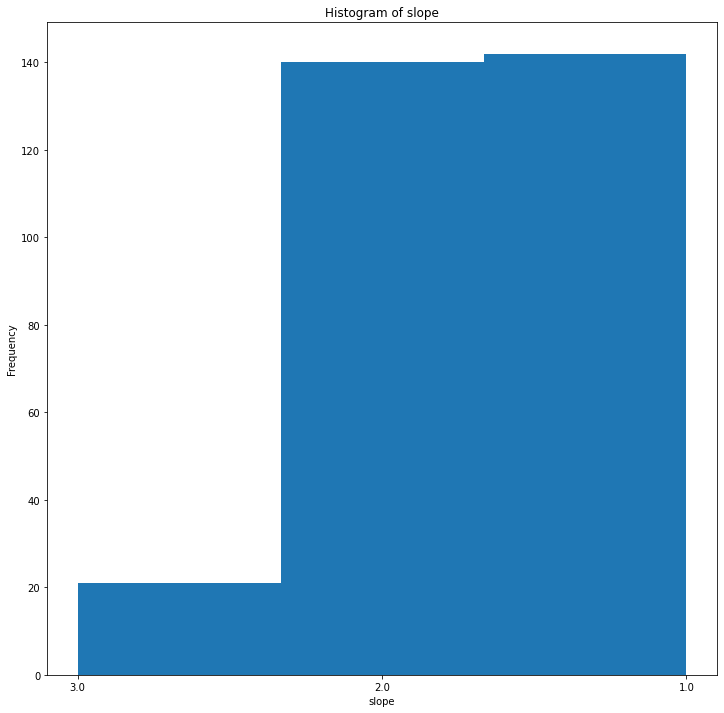

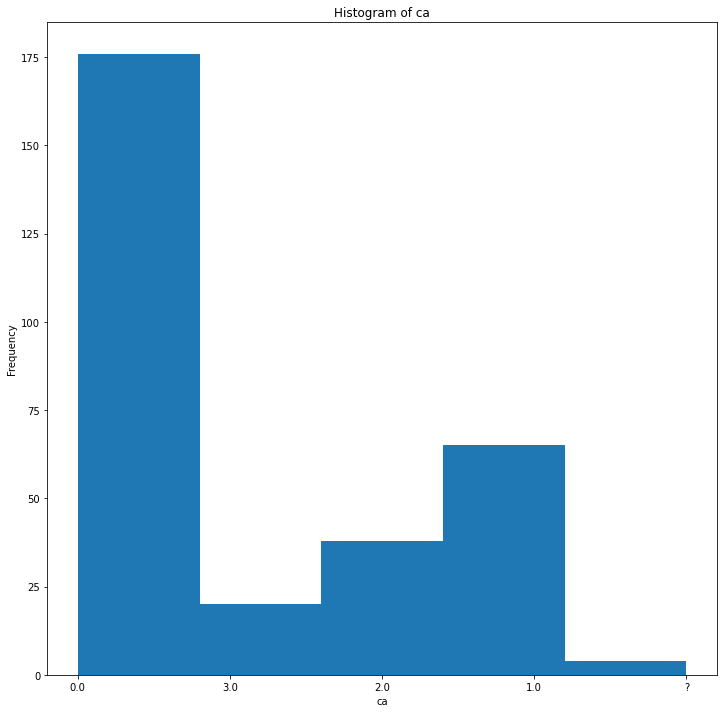

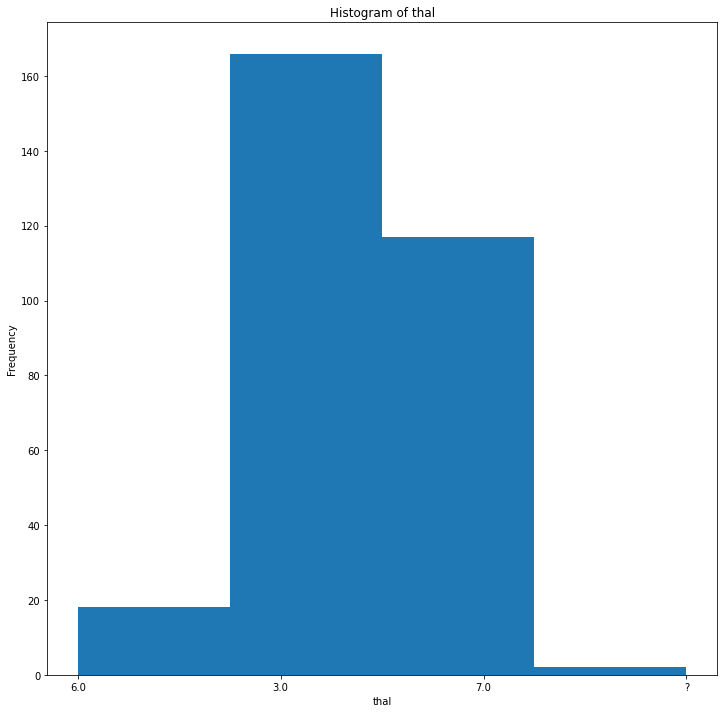

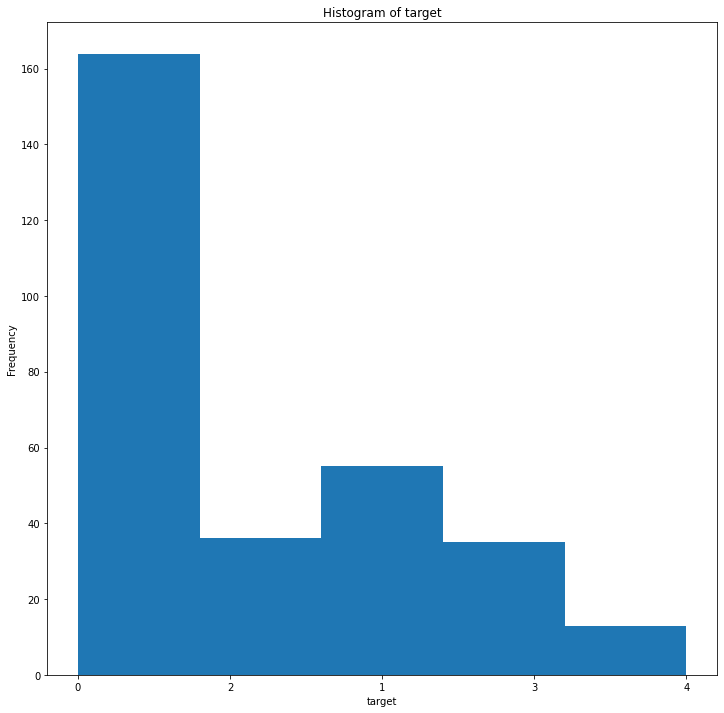

In [10]:
for col in data.columns:
    #print(col)
    value_count = data[col].value_counts()
    #print(value_count)
    plt.figure(figsize=(12,12))
    plt.hist(data[col],bins=value_count.shape[0])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

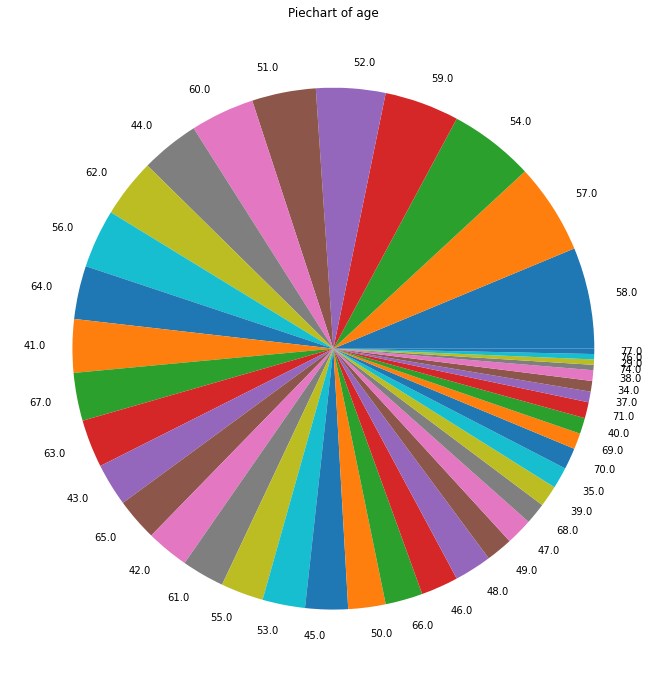

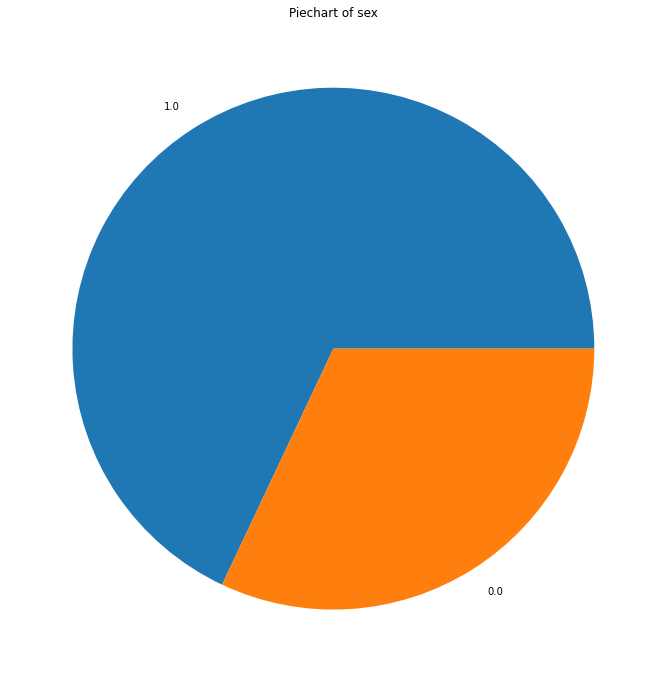

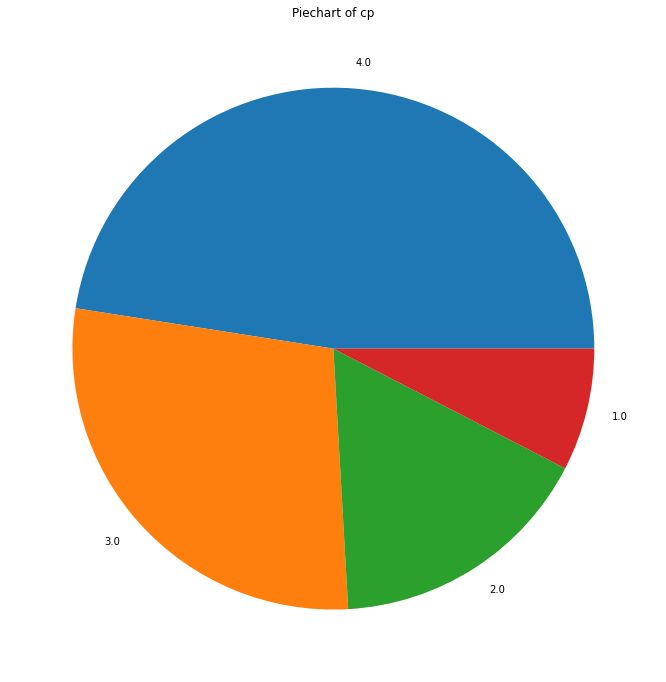

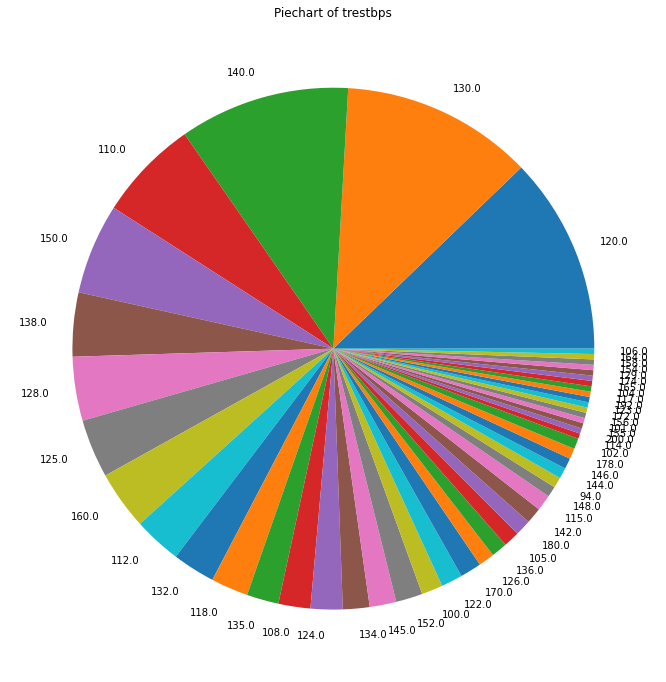

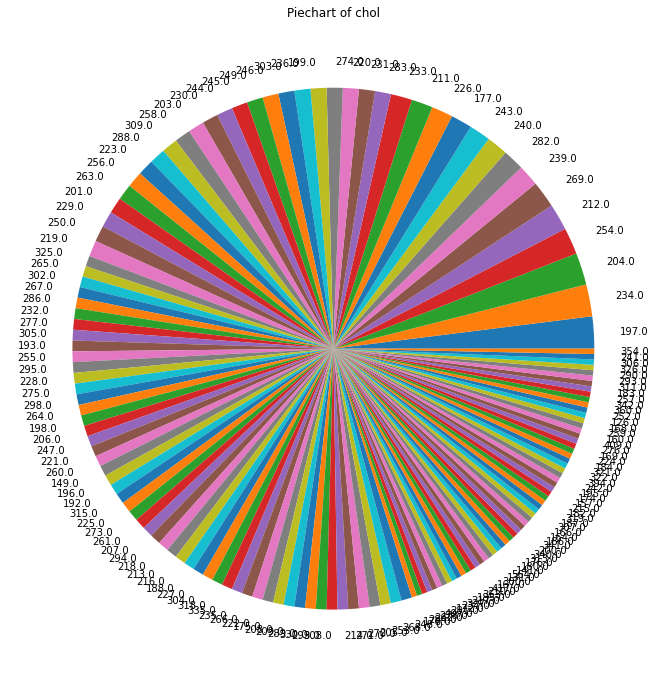

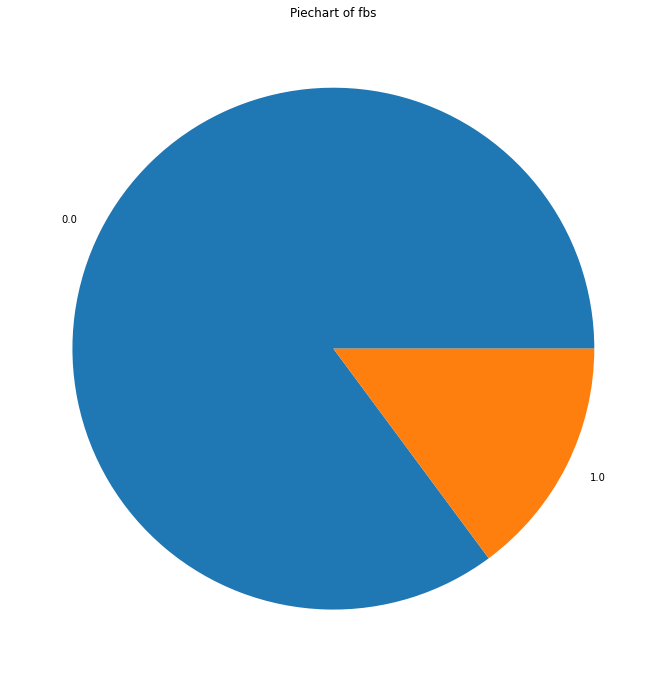

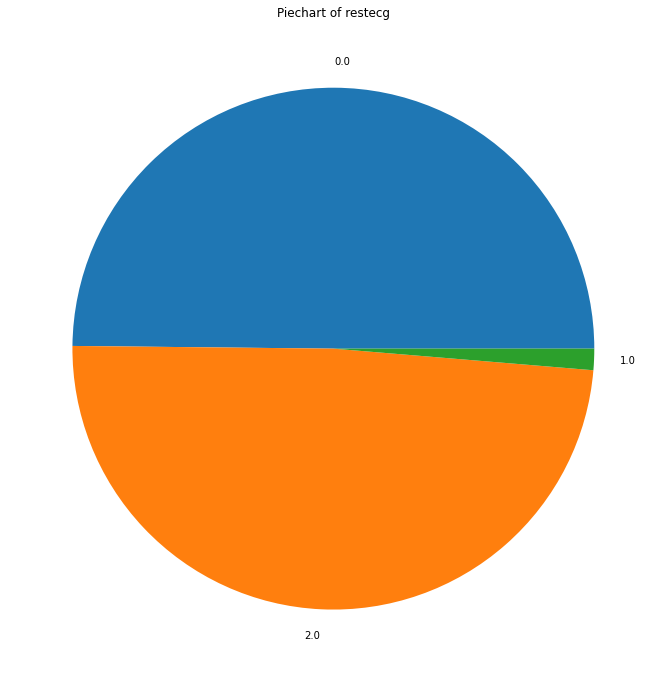

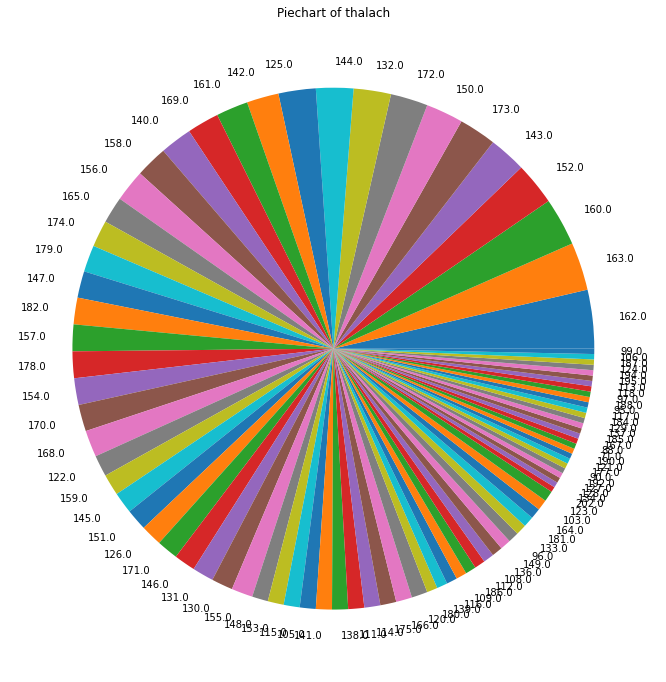

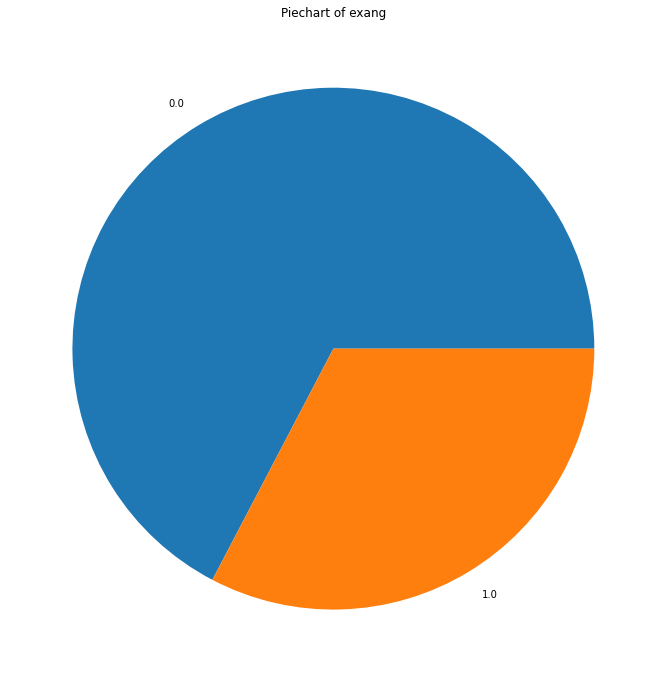

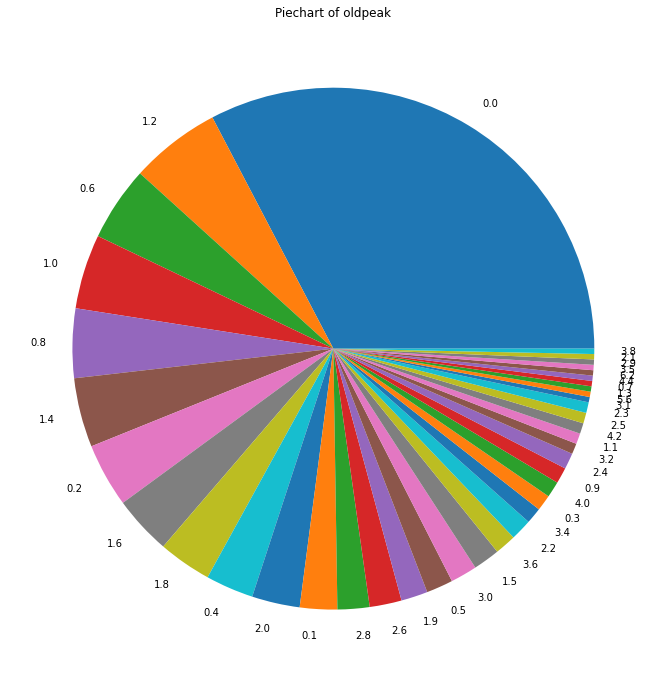

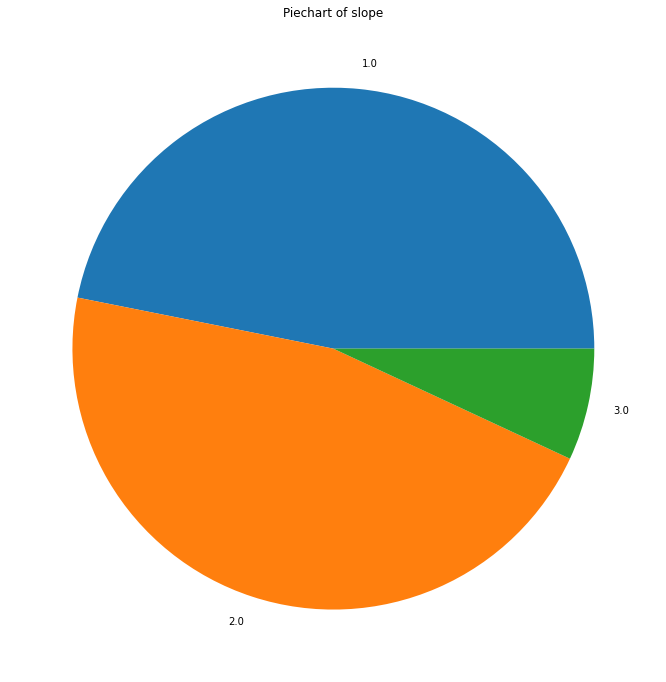

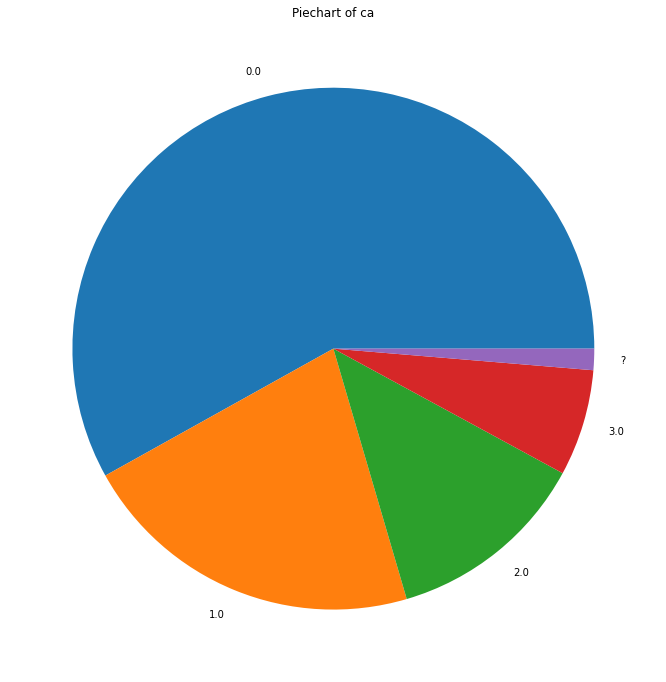

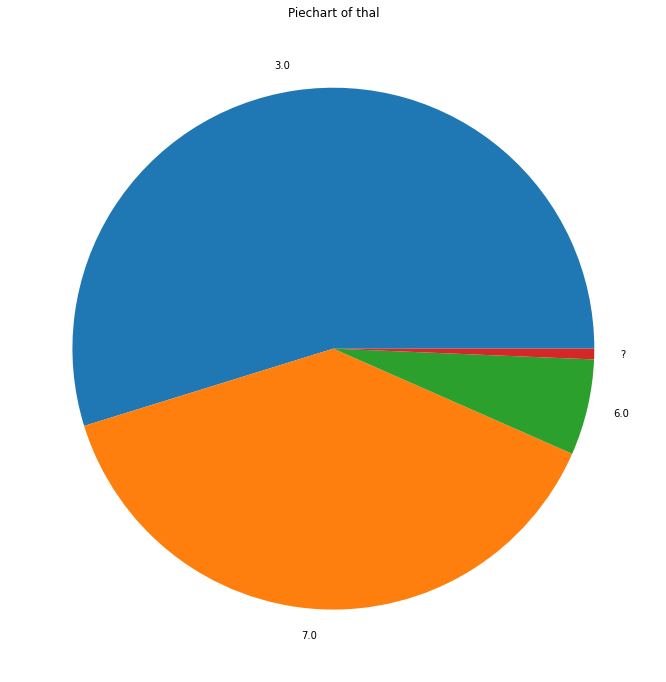

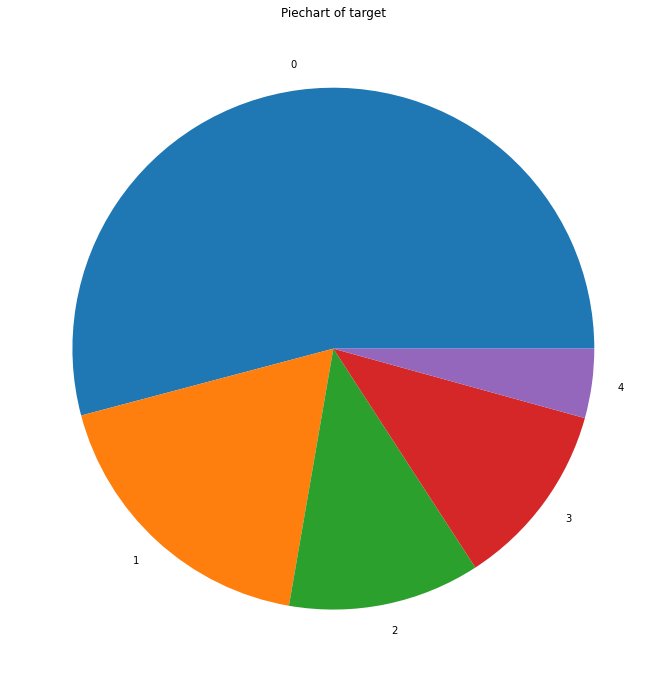

In [11]:
for col in data.columns:
    #print(col)
    value_count = data[col].value_counts()
    #print(value_count)
    plt.figure(figsize=(12,12))
    plt.pie(value_count,labels=value_count.index)
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    plt.title(f'Piechart of {col}')
    plt.show()

In [12]:
#Understand the meaning and significance of each attribute in the dataset

In [13]:
#age: age in years
#sex: sex (1 = male; 0 = female)
#cp: chest pain type
#-- Value 1: typical angina
#-- Value 2: atypical angina
#-- Value 3: non-anginal pain
#-- Value 4: asymptomatic
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thalach: maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak = ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#-- Value 1: upsloping
#-- Value 2: flat
#-- Value 3: downsloping
#ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# target : the presence of heart disease in the patient
#       value : 0   | not present
#       value : 1-4 | distinguish presence

#  Data Preprocessing

In [14]:
#Handle missing values, if any, by employing suitable strategies (e.g., imputation)

In [15]:
# If some values in a column of a dataset contain "?",it typically indicates missing or unknown values
# The "?" symbol is commonly used as a placeholder to represent missing data in datasets.
#

In [16]:
for column in data.columns:
    # Check if "?" is present in the column
    if data[column].dtype == np.object and "?" in data[column].values:
        # Get the exact locations where "?" is present
        indices = np.where(data[column] == "?")[0]
        print(f"Column: {column}")
        print("Indices with '?':", indices)

Column: ca
Indices with '?': [166 192 287 302]
Column: thal
Indices with '?': [ 87 266]


<ipython-input-16-5f6018aaf5d7>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[column].dtype == np.object and "?" in data[column].values:


In [17]:
# replacing missing values
data = data.replace("?",np.nan)


In [18]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:") # Histogram, Box Plot, Density Plot
print(num_cols)

Categorical Variables:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Numerical Variables:
[]


In [19]:
data1 = data.copy()

In [20]:
# dropping the rows which has "?"
data.drop(87,inplace=True)
data.drop(266,inplace=True)
data.drop(166,inplace=True)
data.drop(192,inplace=True)
data.drop(287,inplace=True)
data.drop(302,inplace=True)
#0.56

In [21]:
X = data.iloc[:,0:13] 
y = data.iloc[:,13]

In [22]:
#Perform necessary data transformations (e.g., encoding categorical variables) and feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

# Model Development

In [24]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

In [25]:
#Implement logistic regression using the scikit-learn library
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
#Train the logistic regression model on the training data

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
prediction= model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
print(f"Accuracy:{accuracy_score(y_test,prediction)}")
#print(f"Precision:{precision_score(y_test,prediction)}")
#print(f"Recall:{recall_score(y_test,prediction)}")
#print(f"F1-Score:{(y_test,prediction)}")

Accuracy:0.56


# Model Optimization

In [30]:
# Handling missing value
from sklearn.impute import SimpleImputer

In [31]:
data = data1

In [32]:
# Impute missing values with mean using SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
data_mean = pd.DataFrame(imputer_mean.fit_transform(data), columns=data.columns)
#0.6052631578947368

In [33]:
# Impute missing values with median using SimpleImputer
#imputer_median = SimpleImputer(strategy='median')
#data_mean = pd.DataFrame(imputer_median.fit_transform(data), columns=data.columns)
#0.6052631578947368

In [34]:
# Impute missing values with mode using SimpleImputer
#imputer_mode = SimpleImputer(strategy='most_frequent')
#data_mean = pd.DataFrame(imputer_mode.fit_transform(data), columns=data.columns)
#0.8648648648648649

In [35]:
data_mean.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

In [36]:
data_mean['sex']=data_mean['sex'].astype(int)
data_mean['age']=data_mean['age'].astype(int)
data_mean['cp']=data_mean['cp'].astype(int)
data_mean['trestbps']=data_mean['trestbps'].astype(int)
data_mean['chol']=data_mean['chol'].astype(int)
data_mean['fbs']=data_mean['fbs'].astype(int)
data_mean['restecg']=data_mean['restecg'].astype(int)
data_mean['thalach']=data_mean['thalach'].astype(int)
data_mean['exang']=data_mean['exang'].astype(int)
data_mean['slope']=data_mean['slope'].astype(int)
data_mean['ca']=data_mean['ca'].astype(int)
data_mean['thal']=data_mean['thal'].astype(int)

In [37]:
X = data_mean.iloc[:,0:13] 
y = data_mean.iloc[:,13]

In [38]:
X_std=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)
model = LogisticRegression()
model.fit(X_train,y_train)
prediction= model.predict(X_test)
print(f'accuracy:{accuracy_score(y_test,prediction)}')

accuracy:0.6052631578947368


# Improving the Performance

In [39]:
data_mean['target'] = data_mean['target'].replace([1,2,3,4],1)

In [40]:
X = data_mean.iloc[:,0:13] 
y = data_mean.iloc[:,13]

In [41]:
X_std=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)
model = LogisticRegression()
model.fit(X_train,y_train)
prediction= model.predict(X_test)
print(f"y_test:{np.array(y_test)}")
print(f"Prediction:{prediction}")
print(f"Accuracy:{accuracy_score(y_test,prediction)}")
print(f"Precision:{precision_score(y_test,prediction)}")
print(f"Recall:{recall_score(y_test,prediction)}")
print(f"F1-Score:{(y_test,prediction)}")

y_test:[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1.]
Prediction:[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1.]
Accuracy:0.881578947368421
Precision:0.9032258064516129
Recall:0.8235294117647058
F1-Score:(18     0.0
112    0.0
102    0.0
275    0.0
92     0.0
      ... 
187    1.0
203    0.0
176    0.0
44     1.0
290    1.0
Name: target, Length: 76, dtype: float64, array([0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0

# Model Evaluation

In [42]:
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
cm = confusion_matrix(y_test,prediction)
cm

array([[39,  3],
       [ 6, 28]], dtype=int64)

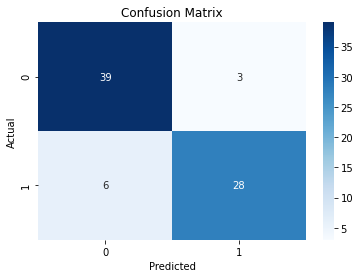

In [43]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

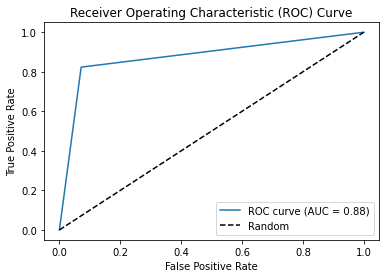

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

# Compute the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, prediction)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
input = X_test[1]
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=model.predict(input_reshaped)
if (pre1==1):
    print("The patient seems to be having heart disease :(")
else:
    print("The patient seems to be normal :)")

The patient seems to be normal :)
